# In this notebook,we will be working on Data Exploration,Manipulation and Univariate and Bivariate Analysis of our dataset


In [2]:
import pandas as pd


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('chennai_house_price_prediction.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [5]:
df.shape

(7109, 19)

# Data Exploration

In [6]:
#summary of all continuos variables
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [7]:
#summary of all continuos and categorical variables
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P00562,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


**Checking missing vales for each column.**

In [8]:

df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

**Checking the types of the different variables**

In [9]:

df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [10]:
temp=pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

In [11]:
temp.head()

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4


# UNIVARIATE ANALYSIS

## HISTOGRAMS

Text(0.5,0,'Sales')

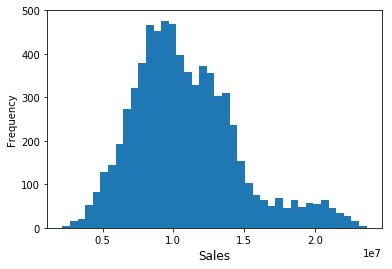

In [12]:
df['SALES_PRICE'].plot.hist(bins=40)
plt.xlabel('Sales',fontsize=12)

**The SALES_PRICE variable is rightly skewed with some houses having price on the higher end**


Text(0.5,0,'Area in sq. feet')

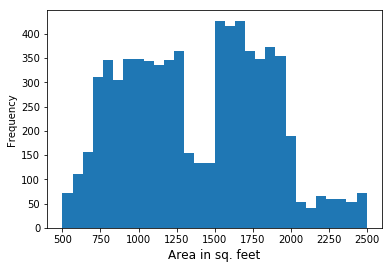

In [13]:
#Area of house in square feet
df['INT_SQFT'].plot.hist(bins=30)
plt.xlabel('Area in sq. feet',fontsize=12)

**Most houses have area betwwen 750sq ft to 1250 sqft or between 1500 sqft and 2000 sqft**

**Very less number of houses have area more than 2000 sqft and less than 750 sqft**


In [14]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

**53% houses have 1 bedroom**

**33% houses have 2 bedrooms**

**less than 10% houses have 3 bedrooms and only 3% houses have 4 bedrooms**

In [15]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

**78% houses have 1 bathroom.**

**Only 21% houses have 2 bathrooms**

In [16]:
df['N_ROOM'].value_counts()/len(df)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

**No houses with 1 room and very less with 2 and 6 **

## Bar Plots

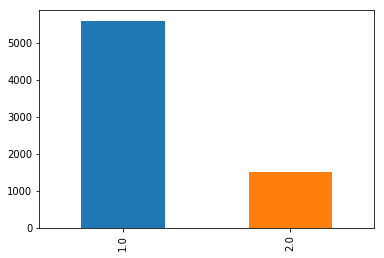

In [17]:
df['N_BATHROOM'].value_counts().plot.bar()

**Majority of houses have 1 bathroom and only a small number have 2**

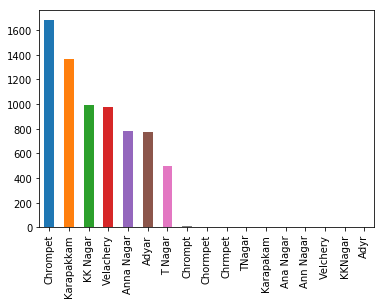

In [18]:
df['AREA'].value_counts().plot.bar()

**The AREA variable has 17 diff entries but majority of houses lie in Chrompet area followed by Karapakkam**

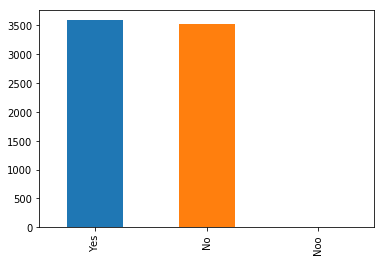

In [19]:
df['PARK_FACIL'].value_counts().plot.bar()

**The number of houses with and without parking facility are almost the same**

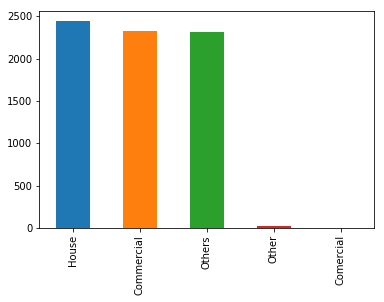

In [20]:
df['BUILDTYPE'].value_counts().plot.bar()

**The BUILDTYPE for most of the houses is either Residencial or Commercial**

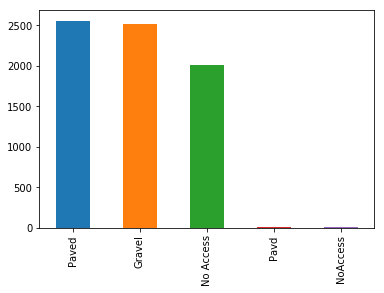

In [21]:
df['STREET'].value_counts().plot.bar()

**Most of the houses have either paved or gravel street type**

**Around 2000 houses have no concrete roads leading to them**

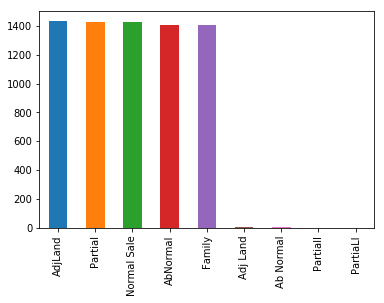

In [22]:
df['SALE_COND'].value_counts().plot.bar()

**Normal-Normal Sale**

**Abnormal-for trade ,foreclosure and short sale**

**AdjLand-Adjoining land purchase**

**Partial-not completed when last assessed**

In [23]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

# Data Manipulation

**1.Drop Duplicates**

**2.Fill the missing values**

**3.Correct the datatypes**

**4.Fix spelling errors in variables** 

In [24]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [25]:
df.drop_duplicates().shape

(7109, 19)

**We dont see any change in the shape of the dataframe as we dont have any duplictae values**

## Missing Values

In [26]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

### 1.N_BEDROOM

In [27]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [28]:
df['N_BEDROOM'].fillna(value=(df['N_BEDROOM'].mode()[0]),inplace=True)

In [29]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [30]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if(df['N_BEDROOM'][i]==1.0):
            df['N_BATHROOM'][i]=1.0
        else:
            df['N_BATHROOM'][i]=2.0
            
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


**imputing missing values with the help of other quality score columns **

In [32]:
def fill_na(x):
    return((x['QS_ROOMS']+x['QS_BATHROOM']+x['QS_BEDROOM'])/3)

In [33]:
df['QS_OVERALL']=df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL'])else x['QS_OVERALL'],axis=1)

In [34]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

## Correcting the datatypes

In [35]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [36]:
df.astype({'N_BEDROOM':'object','N_ROOM':'object','N_BATHROOM':'object'})
#astype fxn used to chnage the variables .

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330000,144400,7600000
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765000,304049,21717770
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090000,92114,13159200
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010000,77042,9630290
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290000,74063,7406250
5,P00219,Chrompet,1220,36,2,1,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320000,198316,12394750
6,P09105,Chrompet,1167,137,1,1,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670000,33955,8488790
7,P09679,Velachery,1847,176,3,2,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260000,235204,16800250
8,P03377,Chrompet,771,175,1,1,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550000,33236,8308970
9,P09623,Velachery,1635,74,2,1,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160000,121255,8083650


## CHANGING CATEGORIES

In [37]:
temp=['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('Value count in',i)
    print(df[i].value_counts())
    print('')

Value count in AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

Value count in N_BEDROOM
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

Value count in N_BATHROOM
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

Value count in N_ROOM
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

Value count in SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

Value count in PARK_FACIL
Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

Value count in 

In [38]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [39]:
df['AREA'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar','Velchery':'Velachery','Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','KKNagar':'KK Nagar','Adyr':'Adyar'},inplace=True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [40]:
df['SALE_COND'].replace({'Adj Land':'AdjLand','Partiall':'Partial','PartiaLl':'Partial','Ab Normal':'AbNormal'},inplace=True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [41]:
df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [42]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [43]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

## Hypothesis
#### 1.Sales price increase with increase in interior sq feet
#### 2.Sales price would depend on the locality as well
#### 3.Higher the number of rooms and bathrooms,higher the sales price 

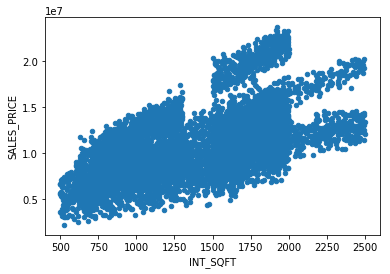

In [44]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

**A very clear linear relationship is visible between sales price and square ft.**

**These have a positve correlation**

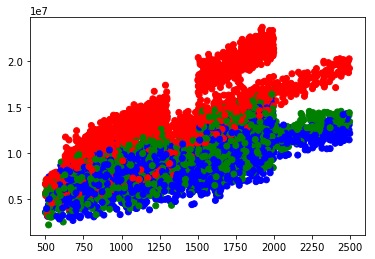

In [46]:
fig, ax=plt.subplots()
colors={'Commercial':'red','House':'blue','Others':'green'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

**We can see commercial houses have higher prices as compared to other categories**

In [47]:
#sales price wth no of bedrooms and bathrooms

In [48]:
df.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


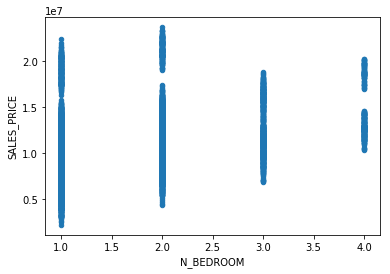

In [49]:
df.plot.scatter('N_BEDROOM','SALES_PRICE')

In [50]:
# QS_OVERALL AND SALES PRICE 

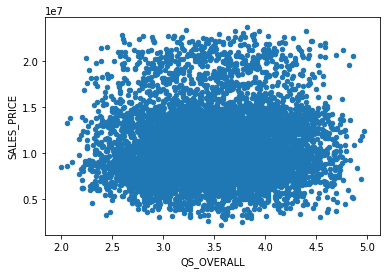

In [51]:
df.plot.scatter('QS_OVERALL','SALES_PRICE')

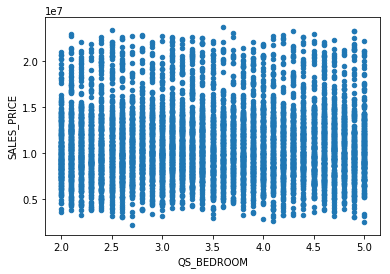

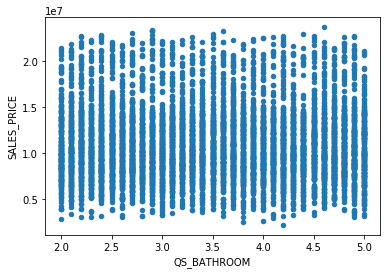

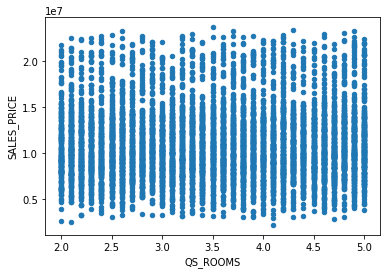

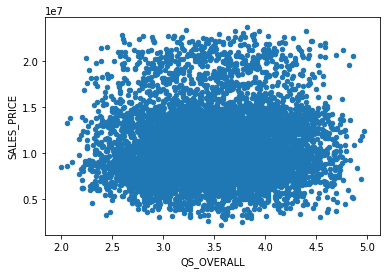

In [52]:
df.plot.scatter('QS_BEDROOM','SALES_PRICE')
df.plot.scatter('QS_BATHROOM','SALES_PRICE')
df.plot.scatter('QS_ROOMS','SALES_PRICE')
df.plot.scatter('QS_OVERALL','SALES_PRICE')

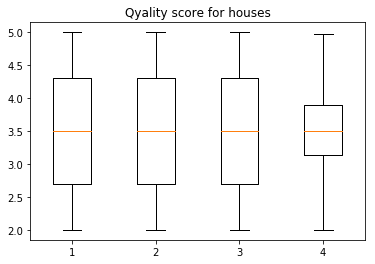

In [53]:
ax=plt.figure().add_subplot(111)
ax.set_title('Qyality score for houses')

bp=ax.boxplot([df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_OVERALL']])

**distribution of number of houses in each quatile is same for all the considered features**

**for QS_OVERALL 50% of values lie in a very small range of 3.2 to 3.7 score**

In [55]:
df.pivot_table(values='SALES_PRICE',index='BUILDTYPE',aggfunc='median')

,SALES_PRICE
BUILDTYPE,
Commercial,13356200
House,8985370
Others,9637260


**houses for commercial purposes have a high sales price**

In [57]:
temp_df=df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]

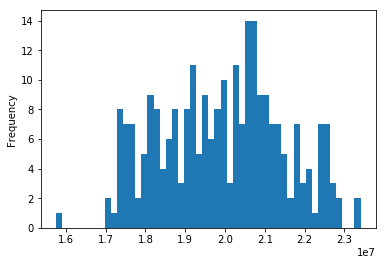

In [58]:
temp_df['SALES_PRICE'].plot.hist(bins=50)

**Almost no house in Anna Nagar with a price less than 1Cr 60Lakh**

**Most of the commercial houses in Anna Nagar are in the range of 2 to 2.3 Cr**

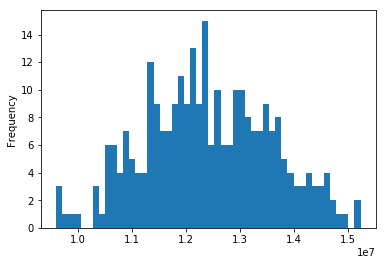

In [61]:
temp_df=df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

**most of the residences also have prices betwwen 1.1CR to 1.5CR**

In [66]:
temo=df.pivot_table(values='SALES_PRICE',index='BUILDTYPE',columns='PARK_FACIL',aggfunc='median')

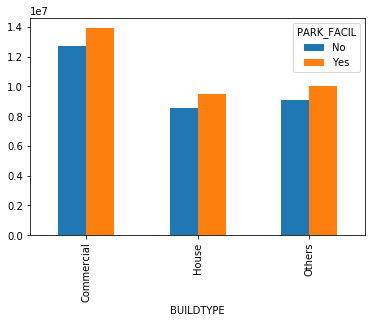

In [67]:
temo.plot.bar()

In [68]:
df.pivot_table(values='SALES_PRICE',index='AREA',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


**T nagar and Anna Nagar are the most expensive places in Chennai**

**Karapakkam is the least expensive**

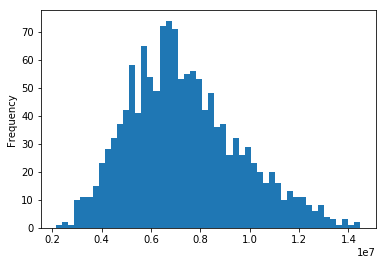

In [70]:
temo_df=df.loc[(df['AREA']=='Karapakkam')]
temo_df['SALES_PRICE'].plot.hist(bins=50)

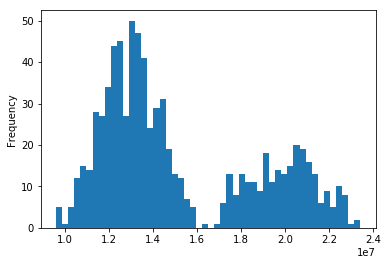

In [71]:
temp_df=df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

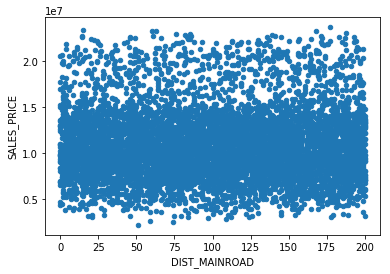

In [72]:
df.plot.scatter('DIST_MAINROAD','SALES_PRICE')

In [74]:
df.pivot_table(values='SALES_PRICE',index='STREET',aggfunc='median')

,SALES_PRICE
STREET,
Gravel,10847225
No Access,9406050
Paved,10470070


**we can observe that the prices drop if the houses are not accessible from the mainroad**

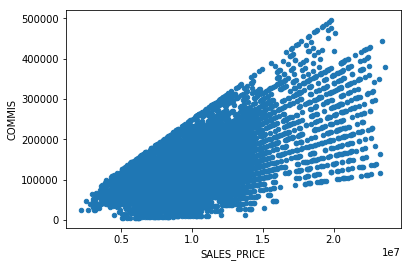

In [77]:
df.plot.scatter('SALES_PRICE','COMMIS')

**From this scatter plot we can see that for lower SALES_PRICE,the Commision is also low and that both variables have a linear relationship**